In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


# descriptive result

In [3]:
from statistics import mean
from statistics import median
from statistics import mode
print('mean of total cases in all countries:\n',df['charges'].mean())

mean of total cases in all countries:
 13270.422265141257


In [4]:
from scipy import stats
stats.mode(df['charges'])

ModeResult(mode=array([1639.5631]), count=array([2]))

In [5]:
from scipy.stats import skew,kurtosis
skew(df['charges']), kurtosis(df['charges'])

(1.5141797118745743, 1.595821363956751)

In [6]:
result=df.describe()
result

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,1.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


# correlation and covariance

In [7]:
df[['age','charges','bmi']].cov().head()

,age,charges,bmi
age,197.401387,5.087480e+04,9.362337
charges,50874.802298,1.466524e+08,14647.304426
bmi,9.362337,1.464730e+04,37.187884


In [8]:
np.corrcoef(df[['age','charges','bmi']])

array([[1.        , 0.99997129, 0.99999986, ..., 0.99995266, 0.99999866,
        0.99999901],
       [0.99997129, 1.        , 0.99997511, ..., 0.99999768, 0.99998236,
        0.99995963],
       [0.99999986, 0.99997511, 1.        , ..., 0.99995761, 0.99999938,
        0.99999814],
       ...,
       [0.99995266, 0.99999768, 0.99995761, ..., 1.        , 0.99996726,
        0.99993798],
       [0.99999866, 0.99998236, 0.99999938, ..., 0.99996726, 1.        ,
        0.99999536],
       [0.99999901, 0.99995963, 0.99999814, ..., 0.99993798, 0.99999536,
        1.        ]])

In [9]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,0.006308,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.012816,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.262754,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,0.001205,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,0.038873,-0.787251
region,0.006308,0.012816,-0.262754,0.001205,0.038873,1.000000,-0.039473
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,-0.039473,1.000000


<AxesSubplot:>

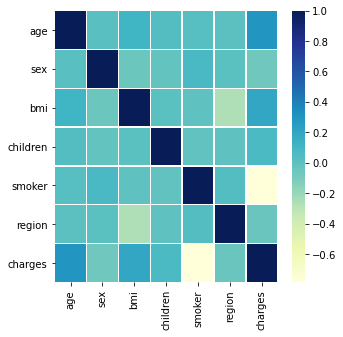

In [10]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(5, 5))

sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.3)

# visualization of charges

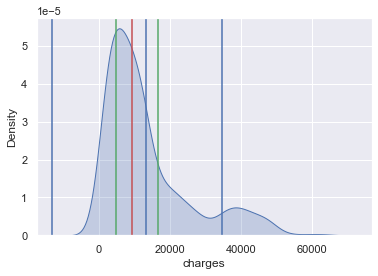

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

sns.kdeplot(df['charges'], shade=True)
plt.axvline(df['charges'].mean(), 0, 1)
plt.axvline(df['charges'].median(), 0, 1, color='r')
plt.axvline(result['charges']['25%'], 0, 1, color='g')
plt.axvline(result['charges']['75%'], 0, 1, color='g')

IQR = result['charges']['75%'] - result['charges']['25%']

upper_outliers = result['charges']['75%'] + 1.5*IQR
lower_outliers = result['charges']['25%'] - 1.5*IQR

plt.axvline(upper_outliers, 0, 1, color='b')
plt.axvline(lower_outliers, 0, 1, color='b')

C:\Users\falla\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


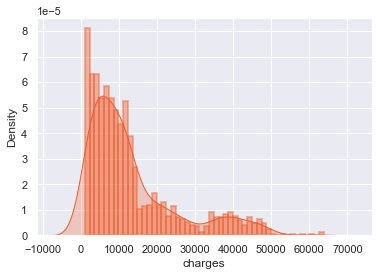

In [12]:
p = sns.distplot(df['charges'], 
                 color='#F15B2A', 
                 hist_kws=dict(edgecolor='#F15B2A', linewidth=2),
                 bins=50,
                 kde=True,
                 kde_kws=dict(shade=True))

C:\Users\falla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


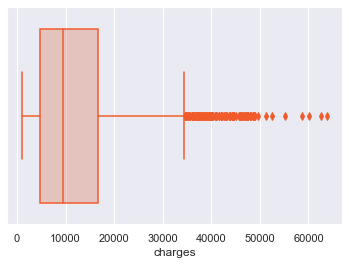

In [13]:
p = sns.boxplot(df['charges'],
               palette=["#F15B2A"])
for e in p.artists:
  r, g, b, a = e.get_facecolor()
  e.set_facecolor((r, g, b, .3))
  
for i, artist in enumerate(p.artists):
    artist.set_edgecolor("#F15B2A")
    
for j in range(0,6):
    line = p.lines[j]
    line.set_color("#F15B2A")
    line.set_mfc("#F15B2A")
    line.set_mec("#F15B2A")


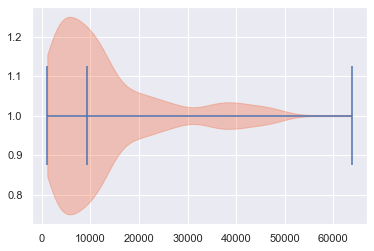

In [14]:
parts = plt.violinplot(df['charges'],
                      vert=False,
                      showmeans=False,
                      showmedians=True)

for p in parts['bodies']:
  p.set_facecolor('#F15B2A')
  p.set_edgecolor('#F15B2A')
  p.set_alpha(0.3)

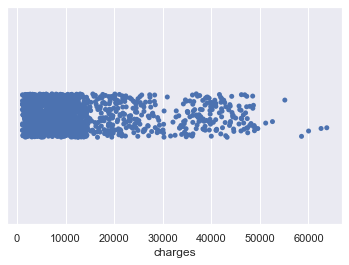

In [15]:
p = sns.stripplot(x=df['charges'],color = 'b',jitter = 1)

C:\Users\falla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


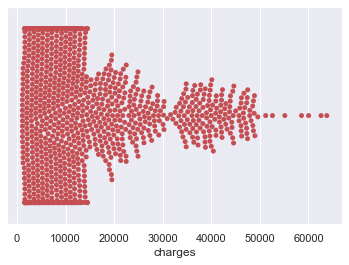

In [16]:
p = sns.swarmplot(x=df['charges'],
                  color = 'r')

C:\Users\falla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


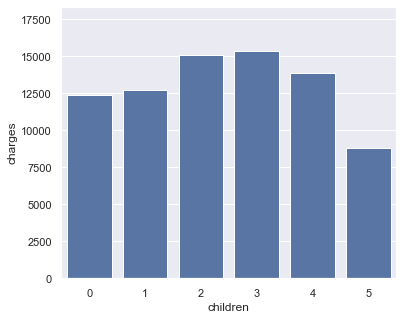

In [17]:
fig = plt.figure(figsize=(6, 5))
ax = sns.barplot('children', y='charges', 
                 data=df, palette=['b'],
                 errwidth=0)

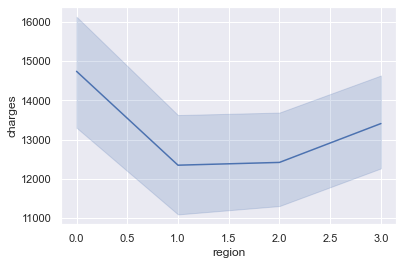

In [18]:
ax = sns.lineplot(x='region', y='charges', data=df)

# analysis tests- t test and anova one way

In [19]:
df['sex'].unique()

array([1, 0], dtype=int64)

In [20]:
stats.ttest_ind(df['charges'], df['sex'])

Ttest_indResult(statistic=40.082247024073716, pvalue=1.5694907282666602e-275)

In [21]:
stats.f_oneway(df['charges'][df['sex'] == 0],
               df['charges'][df['sex'] == 1])

F_onewayResult(statistic=4.3997016974374565, pvalue=0.03613272100596256)

# mulrivarble analysis

<AxesSubplot:xlabel='charges', ylabel='bmi'>

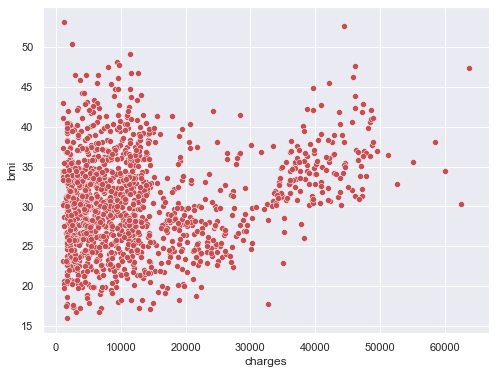

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(x='charges', y='bmi', data=df, color='r', ax=ax)

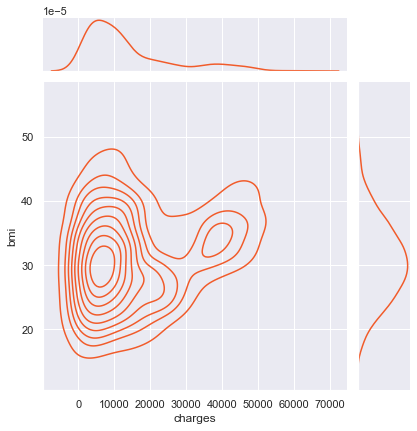

In [25]:
sns.jointplot(x='charges', y='bmi', data=df, color='#F15B2A', kind='kde')

In [26]:
from mpl_toolkits.mplot3d import Axes3D

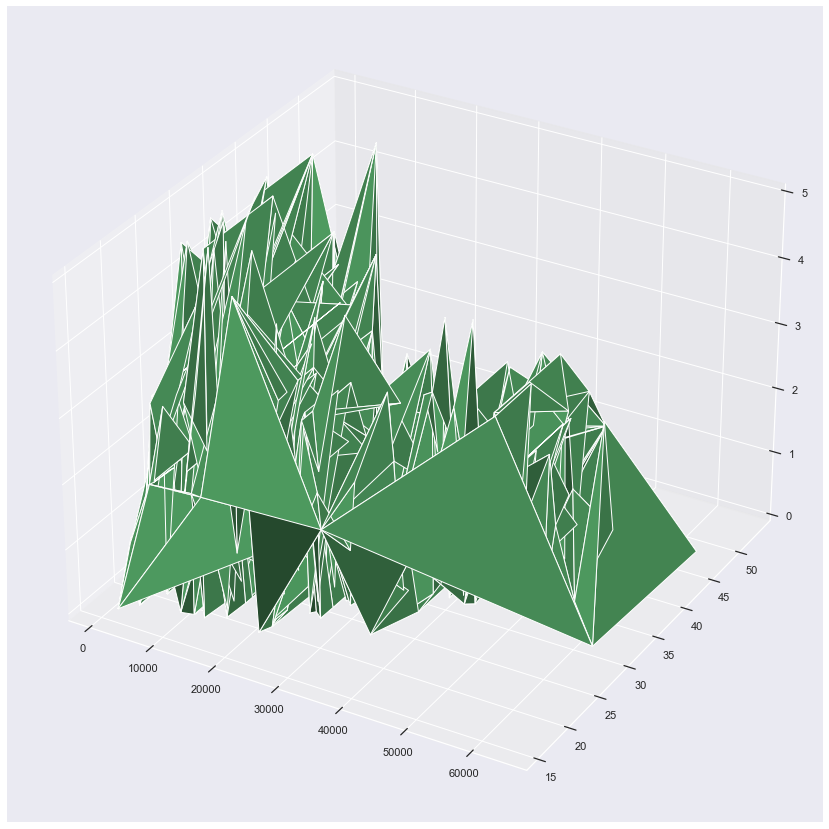

In [27]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

ax.plot_trisurf(df['charges'], df['bmi'], df['children'], color='g')

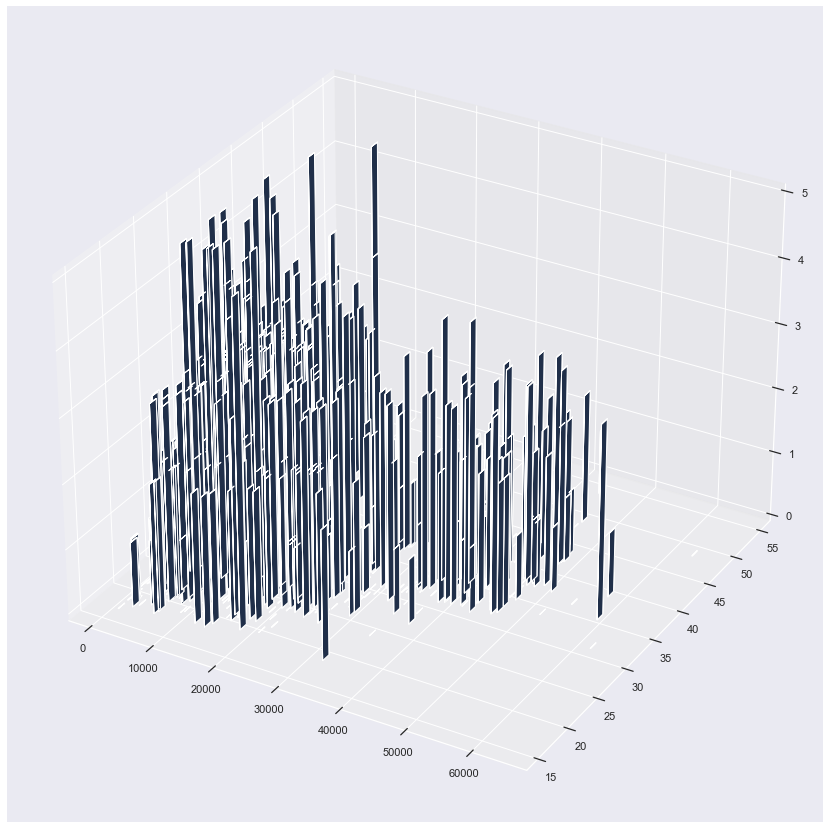

In [28]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(df['charges'], df['bmi'], np.zeros(len(df['children'])), 1, 1, df['children'], shade=True, color='b') 

<AxesSubplot:xlabel='sex', ylabel='charges'>

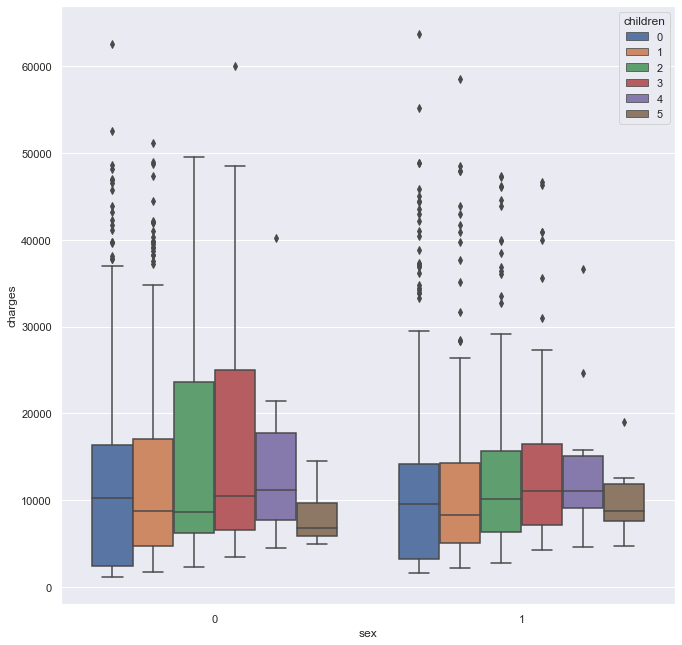

In [29]:
fig, ax = plt.subplots(figsize=(11,11))

sns.boxplot(x='sex', y='charges', hue='children', data=df, ax=ax)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

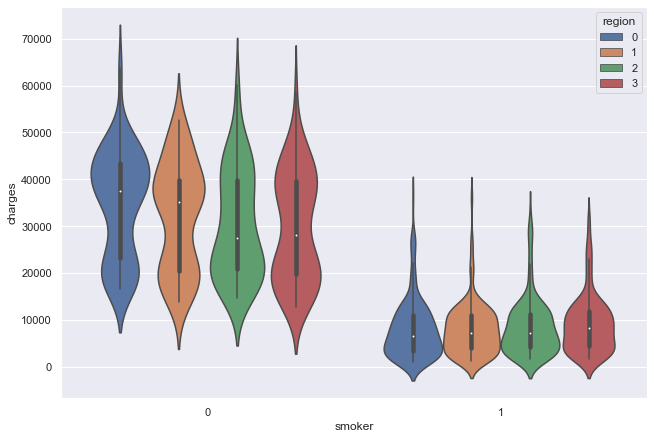

In [30]:
fig, ax = plt.subplots(figsize=(10.5, 7.2)) 

sns.violinplot(x='smoker', y='charges', hue='region', data=df, ax=ax)